In [ ]:
LGM -VIP

In [ ]:
Rashmi S

In [ ]:
Handwritten equation solver using CNN

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
import pathlib
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import cv2

In [2]:
folders=os.listdir( '/kaggle/input/handwrittenmathsymbols/extracted_images/')
data = []
label = []
m=0
for each in folders:
    currentFolder = '/kaggle/input/handwrittenmathsymbols/extracted_images/' + each
    for i, file in enumerate(os.listdir(currentFolder)):
        im= cv2.imread((os.path.join(currentFolder, file)))
        img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(img, (8,8))
        img = img = np.array(resized_image)
        img = img.ravel()
        img = img.tolist()
        data.append(img)
        label.append(m)
    m+=1
df = pd.DataFrame(data)
df["label"] = label

df = df.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
20770,255,255,255,253,254,254,255,255,255,255,...,255,255,255,255,254,207,254,255,255,1
48102,255,254,210,255,254,253,255,255,255,255,...,255,255,255,255,254,222,255,254,255,4
64039,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,6
49767,255,255,255,255,190,253,255,255,255,255,...,255,255,255,255,254,255,255,255,255,4
94606,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,6


In [3]:
df_new = df.sample(frac=1)
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,:-1], df_new.iloc[:,-1], test_size=0.3, shuffle=False)

In [4]:
print('Training dataset contains: ', X_train.shape, ' data')
print('Testing dataset contains: ', X_test.shape, ' data')
print('Validation dataset contains: ', y_train.shape, ' data')
print('Validation dataset contains: ', y_test.shape, ' data')

Training dataset contains:  (67500, 64)  data
Testing dataset contains:  (28929, 64)  data
Validation dataset contains:  (67500,)  data
Validation dataset contains:  (28929,)  data


In [5]:
from sklearn.metrics import classification_report

def svm_model(X_train, X_test, y_train, y_test):
    from sklearn import svm
    svm_classifier = svm.SVC(kernel='rbf',gamma=0.001,C=5)
    svm_classifier.fit(X_train, y_train)
    predicted = svm_classifier.predict(X_test)
    Predicted = np.argmax(predicted, axis=1)
    print(classification_report(y_test.argmax(axis=1), Predicted,target_names=lb.classes_))

def gaussian_naive_bayes(X_train, X_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    GNB_classifier = GaussianNB()
    GNB_classifier.fit(X_train, y_train)
    predicted = GNB_classifier.predict(X_test)
    accuracy = (len(X_test[predicted == y_test]) / len(X_test)) * 100
    return accuracy

def decision_tree(X_train, X_test, y_train, y_test):
    from sklearn import tree
    dt_classifier = tree.DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    predicted = dt_classifier.predict(X_test)
    accuracy = (len(X_test[predicted == y_test]) / len(X_test)) * 100
    return accuracy

def random_forest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
    RF_classifier.fit(X_train, y_train)
    predicted = RF_classifier.predict(X_test)
    accuracy = (len(X_test[predicted == y_test]) / len(X_test)) * 100
    return accuracy

def k_nearest_neighbors(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    KNN_classifier.fit(X_train, y_train)
    predicted = KNN_classifier.predict(X_test)
    accuracy = (len(X_test[predicted == y_test]) / len(X_test)) * 100
    return accuracy

def stochastic_gradient_decend(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import SGDClassifier
    sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    sgd_classifier.fit(X_train, y_train)
    predicted = sgd_classifier.predict(X_test)
    accuracy = (len(X_test[predicted == y_test]) / len(X_test)) * 100
    return accuracy

def xgboost(X_train, X_test, y_train, y_test):
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(X_train, y_train)
    # make predictions for test data
    predicted = model.predict(X_test)
    accuracy = (len(X_test[predicted == y_test]) / len(X_test)) * 100
    return accuracy

def using_tsne(X_train,y_train):

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X_train)
    sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], hue=y_train, legend='full', palette=palette)
    plt.show()

In [6]:
k_nearest_neighbors(X_train, X_test, y_train, y_test)

91.53098966435064

In [7]:
print(random_forest(X_train, X_test, y_train, y_test))

71.88979916346918


In [8]:
print(decision_tree(X_train, X_test, y_train, y_test))

99.07013723253483


Text(0.5, 1.0, 'Predicted vs. Actual Values ')

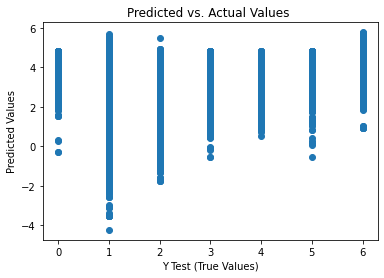

In [9]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values ')


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)


0.9948840264094853